<a href="https://colab.research.google.com/github/Henriquerezer/Machine_Learning/blob/main/COURSERA/IBM/Classification/atividade_classifica%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bank Marketing DataSet - Intelligent Targeting:
Marketing Introduction:
The process by which companies create value for customers and build strong customer relationships in order to capture value from customers in return.

Kotler and Armstrong (2010).

**Marketing campaigns** are characterized by focusing on the customer needs and their overall satisfaction. Nevertheless, there are different variables that determine whether a marketing campaign will be successful or not. There are certain variables that we need to take into consideration when making a marketing campaign.

# The 4 Ps:
1) Segment of the **Population**: To which segment of the population is the marketing campaign going to address and why? This aspect of the marketing campaign is extremely important since it will tell to which part of the population should most likely receive the message of the marketing campaign.

2) Distribution channel to reach the customer's **place**: Implementing the most effective strategy in order to get the most out of this marketing campaign. What segment of the population should we address? Which instrument should we use to get our message out? (Ex: Telephones, Radio, TV, Social Media Etc.)

3) Price: What is the best **price** to offer to potential clients? (In the case of the bank's marketing campaign this is not necessary since the main interest for the bank is for potential clients to open depost accounts in order to make the operative activities of the bank to keep on running.)

4) **Promotional** Strategy: This is the way the strategy is going to be implemented and how are potential clients going to be address. This should be the last part of the marketing campaign analysis since there has to be an indepth analysis of previous campaigns (If possible) in order to learn from previous mistakes and to determine how to make the marketing campaign much more effective.

# Regarding this Kernel:
I know this is a well known dataset since it comes from **UCI Machine Learning Repository**. However, I believe there are some interesting insights you could see that you could integrate to your own data analysis. All in all, Kaggle is meant to learn from others and I hope this example suits you well.


Also, I'm open to new ideas and things that I could improve to make this kernel even better! Open to constructie criticisms! Lastly, I will like to give a special thanks to Randy Lao and his well-known Predicting Employee Kernelover. His kernel gave me different ideas as to how should I approach an analysis of a dataset.

Also, I want to give credit to this stackoverflow post, which helped me change the name of legends from Facetgrids.
https://stackoverflow.com/questions/45201514/edit-seaborn-plot-figure-legend
Check it out if you are struggling with the same problem.


What is a Term Deposit?
A **Term deposit** is a deposit that a bank or a financial institurion offers with a fixed rate (often better than just opening deposit account) in which your money will be returned back at a specific maturity time. For more information with regards to Term Deposits please click on this link from Investopedia: https://www.investopedia.com/terms/t/termdeposit.asp



# A. Attributes Description:
Input variables:

# Ai. bank client data:
  1 - age: (numeric)

  2 - job: type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

  3 - marital: marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

  4 - education: (categorical: primary, secondary, tertiary and unknown)

  5 - default: has credit in default? (categorical: 'no','yes','unknown')

  6 - housing: has housing loan? (categorical: 'no','yes','unknown')

  7 - loan: has personal loan? (categorical: 'no','yes','unknown')
  
  8 - balance: Balance of the individual.

# Aii. Related with the last contact of the current campaign:
  8 - contact: contact communication type (categorical: 'cellular','telephone')

  9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

  10 - day: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

  11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

# Aiii. other attributes:
  12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

  13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

  14 - previous: number of contacts performed before this campaign and for this client (numeric)

  15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

# Output variable (desired target):
  21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [ ]:
#basic libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/Henriquerezer/FLAI-Cursos/main/Rafinha_dos_dados_cursos/Classifica%C3%A7%C3%A3o/Dados/base_rf.csv')
display(data)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [ ]:
X = data.drop('y', axis = 1)
y = data['y']

In [ ]:
data['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [ ]:
data.loc[:,'y'] = data.y.replace('no',0).replace('yes',1)
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


# Regressão Logistica

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42, stratify = y)

In [ ]:
X['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [ ]:
X['marital'].unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [ ]:
possiveis_education = pd.CategoricalDtype([ 'illiterate','unknown','basic.4y', 'basic.6y', 'basic.9y', 'high.school','professional.course', 'university.degree'], ordered = True)

possiveis_Marital_Status = pd.CategoricalDtype(X_train.marital.unique())

possiveis_job = pd.CategoricalDtype(X_train.job.unique())

possiveis_day_of_week = pd.CategoricalDtype(X_train.day_of_week.unique())

possiveis_contact = pd.CategoricalDtype(X_train.contact.unique())

possiveis_loan = pd.CategoricalDtype(X_train.loan.unique())

possiveis_housing = pd.CategoricalDtype(X_train.housing.unique())

possiveis_default = pd.CategoricalDtype(X_train.default.unique())

possiveis_month = pd.CategoricalDtype(X_train.month.unique())

possiveis_poutcome = pd.CategoricalDtype(X_train.poutcome.unique())

possiveis_education

CategoricalDtype(categories=['illiterate', 'unknown', 'basic.4y', 'basic.6y', 'basic.9y',
                  'high.school', 'professional.course', 'university.degree'],
, ordered=True)

In [ ]:
possiveis_Marital_Status

CategoricalDtype(categories=['single', 'married', 'divorced', 'unknown'], ordered=False)

In [ ]:
X_train.loc[:, 'education'] = X_train.education.astype(possiveis_education)
X_test.loc[:, 'education'] = X_test.education.astype(possiveis_education)

X_train.loc[:, 'marital'] = X_train.marital.astype(possiveis_Marital_Status)
X_test.loc[:, 'marital'] = X_test.marital.astype(possiveis_Marital_Status)

X_train.loc[:, 'job'] = X_train.job.astype(possiveis_job)
X_test.loc[:, 'job'] = X_test.job.astype(possiveis_job)

X_train.loc[:, 'day_of_week'] = X_train.day_of_week.astype(possiveis_day_of_week)
X_test.loc[:, 'day_of_week'] = X_test.day_of_week.astype(possiveis_day_of_week)

X_train.loc[:, 'contact'] = X_train.contact.astype(possiveis_contact)
X_test.loc[:, 'contact'] = X_test.contact.astype(possiveis_contact)

X_train.loc[:, 'loan'] = X_train.loan.astype(possiveis_loan)
X_test.loc[:, 'loan'] = X_test.loan.astype(possiveis_loan)

X_train.loc[:, 'housing'] = X_train.housing.astype(possiveis_housing)
X_test.loc[:, 'housing'] = X_test.housing.astype(possiveis_housing)

X_train.loc[:, 'default'] = X_train.default.astype(possiveis_default)
X_test.loc[:, 'default'] = X_test.default.astype(possiveis_default)

X_train.loc[:, 'month'] = X_train.month.astype(possiveis_month)
X_test.loc[:, 'month'] = X_test.month.astype(possiveis_month)

X_train.loc[:, 'poutcome'] = X_train.poutcome.astype(possiveis_poutcome)
X_test.loc[:, 'poutcome'] = X_test.poutcome.astype(possiveis_poutcome)

X_train.dtypes
# now all transformed columns are categorical. before were objects

age                  int64
job               category
marital           category
education         category
default           category
housing           category
loan              category
contact           category
month             category
day_of_week       category
campaign             int64
pdays                int64
previous             int64
poutcome          category
emp.var.rate       float64
cons.price.idx     float64
cons.conf.idx      float64
euribor3m          float64
nr.employed        float64
dtype: object

In [ ]:
X_train_dummies =  pd.get_dummies(X_train,columns=['education', 'marital','job', 'day_of_week', 'contact', 'loan', 'housing', 'default', 'month', 'poutcome'], drop_first = True)
X_test_dummies =  pd.get_dummies(X_test,columns=['education', 'marital','job', 'day_of_week', 'contact', 'loan', 'housing', 'default', 'month', 'poutcome'], drop_first = True)

In [ ]:
X_test_dummies


,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,education_unknown,...,month_jul,month_nov,month_aug,month_apr,month_sep,month_dec,month_mar,month_oct,poutcome_failure,poutcome_success
9923,49,1,999,0,1.4,94.465,-41.8,4.959,5228.1,1,...,0,0,0,0,0,0,0,0,0,0
3477,56,2,999,0,1.1,93.994,-36.4,4.860,5191.0,0,...,0,0,0,0,0,0,0,0,0,0
12077,35,1,999,0,1.4,94.465,-41.8,4.947,5228.1,0,...,0,0,0,0,0,0,0,0,0,0
1579,32,2,999,0,1.1,93.994,-36.4,4.855,5191.0,0,...,0,0,0,0,0,0,0,0,0,0
39993,27,4,3,2,-1.7,94.055,-39.8,0.767,4991.6,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18457,32,1,999,0,1.4,93.918,-42.7,4.968,5228.1,0,...,1,0,0,0,0,0,0,0,0,0
12561,46,1,999,0,1.4,93.918,-42.7,4.960,5228.1,0,...,1,0,0,0,0,0,0,0,0,0
20958,32,2,999,0,1.4,93.444,-36.1,4.964,5228.1,0,...,0,0,1,0,0,0,0,0,0,0
32448,38,2,999,1,-1.8,92.893,-46.2,1.313,5099.1,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
X_train_dummies.isnull().sum()

In [ ]:
from sklearn.preprocessing import StandardScaler

#This method will make the mean of the variables equal to 0 and the standard deviation equal to 1
#Most data is between -1 and 1
#This type of climber is interesting when we don't have a variable on a MUCH BIGGER scale
# For example, in this variable "Income", if we have 1 person who earns one thousand reais and another who earns 1 million
#StandardScaler is not ideal

numericas = [
    'age',
    'campaign',
    'pdays',
    'previous',
    'emp.var.rate',
    'cons.price.idx',
    'cons.conf.idx',
    'euribor3m',
    'nr.employed'
]

scalers = {}
X_train_s = X_train_dummies.copy()
X_test_s  = X_test_dummies.copy()

for col in numericas:
  scaler = StandardScaler()
  scaler.fit(X_train_s[[col]])
  X_train_s.loc[:,col] = scaler.transform(X_train_s[[col]])
  X_test_s.loc[:,col] = scaler.transform(X_test_s[[col]])
  scalers[col] = scaler

X_train_s

#Doing it this way, using the for, I'll be applying the climber, column by column, so I'll keep the traceability of the data
# If I apply it to the entire database, the method will return a numpy array
# And I won't know what the relationship of each data is
#Remembering that we apply the escalator, only in numerical variables

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,education_unknown,...,month_jul,month_nov,month_aug,month_apr,month_sep,month_dec,month_mar,month_oct,poutcome_failure,poutcome_success
7309,0.961016,-0.202499,0.198881,-0.350844,0.648136,0.722717,0.887472,0.714873,0.332204,0,...,0,0,0,0,0,0,0,0,0,0
4169,1.057229,0.887201,0.198881,-0.350844,0.648136,0.722717,0.887472,0.713720,0.332204,0,...,0,0,0,0,0,0,0,0,0,0
35810,0.576165,-0.202499,0.198881,-0.350844,-1.198744,-1.181025,-1.231784,-1.368338,-0.935879,0,...,0,0,0,0,0,0,0,0,0,0
9668,0.576165,-0.565732,0.198881,-0.350844,0.839193,1.537124,-0.280281,0.773060,0.844128,0,...,0,0,0,0,0,0,0,0,0,0
34389,-1.444302,0.887201,0.198881,-0.350844,-1.198744,-1.181025,-1.231784,-1.355664,-0.935879,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27855,-1.059451,-0.202499,0.198881,-0.350844,-1.198744,-1.267480,-2.053537,-1.155178,-0.935879,0,...,0,0,0,0,0,0,1,0,0,0
7494,-1.059451,-0.565732,0.198881,-0.350844,0.648136,0.722717,0.887472,0.717177,0.332204,0,...,0,0,0,0,0,0,0,0,0,0
10747,-0.482175,0.160734,0.198881,-0.350844,0.839193,1.537124,-0.280281,0.773060,0.844128,0,...,0,0,0,0,0,0,0,0,0,0
34138,-0.770813,0.523968,0.198881,-0.350844,-1.198744,-1.181025,-1.231784,-1.347022,-0.935879,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

polyfeats = PolynomialFeatures(degree = 2, include_bias = False)
polyfeats.fit(X_train_s)

polyfeats.transform(X_train_s)

array([[ 0.96101604, -0.20249907,  0.19888109, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.05722877,  0.88720116,  0.19888109, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.57616512, -0.20249907,  0.19888109, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.48217491,  0.16073434,  0.19888109, ...,  0.        ,
         0.        ,  0.        ],
       [-0.7708131 ,  0.52396775,  0.19888109, ...,  0.        ,
         0.        ,  0.        ],
       [-0.86702583,  0.16073434,  0.19888109, ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
polyfeats.transform(X_train_s).shape


(28831, 1430)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
polyfeats =  PolynomialFeatures(degree = 2, include_bias = False)
polyfeats.fit(X_train_s)
new_cols=[
     '*'.join([
        f'{col}^{num}' for num,col in zip(powers,X_train_s.columns)if num != 0
     ]).strip('*')
    for powers in polyfeats.powers_
]

X_train_f = pd.DataFrame(polyfeats.transform(X_train_s),columns=new_cols, index = X_train_s.index)
X_test_f = pd.DataFrame(polyfeats.transform(X_test_s),columns = new_cols, index = X_test_s.index)
X_train_f

,age^1,campaign^1,pdays^1,previous^1,emp.var.rate^1,cons.price.idx^1,cons.conf.idx^1,euribor3m^1,nr.employed^1,education_unknown^1,...,month_mar^2,month_mar^1*month_oct^1,month_mar^1*poutcome_failure^1,month_mar^1*poutcome_success^1,month_oct^2,month_oct^1*poutcome_failure^1,month_oct^1*poutcome_success^1,poutcome_failure^2,poutcome_failure^1*poutcome_success^1,poutcome_success^2
7309,0.961016,-0.202499,0.198881,-0.350844,0.648136,0.722717,0.887472,0.714873,0.332204,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4169,1.057229,0.887201,0.198881,-0.350844,0.648136,0.722717,0.887472,0.713720,0.332204,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35810,0.576165,-0.202499,0.198881,-0.350844,-1.198744,-1.181025,-1.231784,-1.368338,-0.935879,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9668,0.576165,-0.565732,0.198881,-0.350844,0.839193,1.537124,-0.280281,0.773060,0.844128,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34389,-1.444302,0.887201,0.198881,-0.350844,-1.198744,-1.181025,-1.231784,-1.355664,-0.935879,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27855,-1.059451,-0.202499,0.198881,-0.350844,-1.198744,-1.267480,-2.053537,-1.155178,-0.935879,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7494,-1.059451,-0.565732,0.198881,-0.350844,0.648136,0.722717,0.887472,0.717177,0.332204,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10747,-0.482175,0.160734,0.198881,-0.350844,0.839193,1.537124,-0.280281,0.773060,0.844128,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34138,-0.770813,0.523968,0.198881,-0.350844,-1.198744,-1.181025,-1.231784,-1.347022,-0.935879,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_train_f.max() - X_train_f.min()

age^1                                     7.793231
campaign^1                               19.977838
pdays^1                                   5.258632
previous^1                               13.949226
emp.var.rate^1                            3.056905
                                           ...    
month_oct^1*poutcome_failure^1            1.000000
month_oct^1*poutcome_success^1            1.000000
poutcome_failure^2                        1.000000
poutcome_failure^1*poutcome_success^1     0.000000
poutcome_success^2                        1.000000
Length: 1430, dtype: float64

In [ ]:
const_cols = X_train_f.columns[(X_train_f.max() - X_train_f.min()) == 0]
const_cols

Index(['education_unknown^1*education_basic.4y^1',
       'education_unknown^1*education_basic.6y^1',
       'education_unknown^1*education_basic.9y^1',
       'education_unknown^1*education_high.school^1',
       'education_unknown^1*education_professional.course^1',
       'education_unknown^1*education_university.degree^1',
       'education_unknown^1*default_yes^1',
       'education_basic.4y^1*education_basic.6y^1',
       'education_basic.4y^1*education_basic.9y^1',
       'education_basic.4y^1*education_high.school^1',
       ...
       'month_apr^1*month_dec^1', 'month_apr^1*month_mar^1',
       'month_apr^1*month_oct^1', 'month_sep^1*month_dec^1',
       'month_sep^1*month_mar^1', 'month_sep^1*month_oct^1',
       'month_dec^1*month_mar^1', 'month_dec^1*month_oct^1',
       'month_mar^1*month_oct^1', 'poutcome_failure^1*poutcome_success^1'],
      dtype='object', length=161)

In [ ]:
X_train_f2 = X_train_f.copy().drop(const_cols,axis=1)
X_test_f2 = X_test_f.copy().drop(const_cols,axis=1)

In [ ]:
X_train_f2

,age^1,campaign^1,pdays^1,previous^1,emp.var.rate^1,cons.price.idx^1,cons.conf.idx^1,euribor3m^1,nr.employed^1,education_unknown^1,...,month_dec^1*poutcome_failure^1,month_dec^1*poutcome_success^1,month_mar^2,month_mar^1*poutcome_failure^1,month_mar^1*poutcome_success^1,month_oct^2,month_oct^1*poutcome_failure^1,month_oct^1*poutcome_success^1,poutcome_failure^2,poutcome_success^2
7309,0.961016,-0.202499,0.198881,-0.350844,0.648136,0.722717,0.887472,0.714873,0.332204,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4169,1.057229,0.887201,0.198881,-0.350844,0.648136,0.722717,0.887472,0.713720,0.332204,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35810,0.576165,-0.202499,0.198881,-0.350844,-1.198744,-1.181025,-1.231784,-1.368338,-0.935879,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9668,0.576165,-0.565732,0.198881,-0.350844,0.839193,1.537124,-0.280281,0.773060,0.844128,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34389,-1.444302,0.887201,0.198881,-0.350844,-1.198744,-1.181025,-1.231784,-1.355664,-0.935879,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27855,-1.059451,-0.202499,0.198881,-0.350844,-1.198744,-1.267480,-2.053537,-1.155178,-0.935879,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7494,-1.059451,-0.565732,0.198881,-0.350844,0.648136,0.722717,0.887472,0.717177,0.332204,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10747,-0.482175,0.160734,0.198881,-0.350844,0.839193,1.537124,-0.280281,0.773060,0.844128,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34138,-0.770813,0.523968,0.198881,-0.350844,-1.198744,-1.181025,-1.231784,-1.347022,-0.935879,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#transposed
dup_cols = X_train_f2.columns[X_train_f2.T.duplicated()]
dup_cols

Index(['housing_unknown^1', 'age^1*housing_unknown^1',
       'campaign^1*housing_unknown^1', 'pdays^1*housing_unknown^1',
       'previous^1*housing_unknown^1', 'emp.var.rate^1*housing_unknown^1',
       'cons.price.idx^1*housing_unknown^1',
       'cons.conf.idx^1*housing_unknown^1', 'euribor3m^1*housing_unknown^1',
       'nr.employed^1*housing_unknown^1', 'education_unknown^2',
       'education_unknown^1*housing_unknown^1', 'education_basic.4y^2',
       'education_basic.4y^1*housing_unknown^1', 'education_basic.6y^2',
       'education_basic.6y^1*housing_unknown^1', 'education_basic.9y^2',
       'education_basic.9y^1*housing_unknown^1', 'education_high.school^2',
       'education_high.school^1*housing_unknown^1',
       'education_professional.course^2',
       'education_professional.course^1*housing_unknown^1',
       'education_university.degree^2',
       'education_university.degree^1*housing_unknown^1', 'marital_married^2',
       'marital_married^1*housing_unknown^1',
  

In [ ]:
X_train_f2 = X_train_f2.drop(dup_cols, axis = 1)
X_test_f2 = X_test_f2.drop(dup_cols, axis = 1)

In [ ]:
corr_cat = X_train_f2.corr('spearman')
corr_cat

,age^1,campaign^1,pdays^1,previous^1,emp.var.rate^1,cons.price.idx^1,cons.conf.idx^1,euribor3m^1,nr.employed^1,education_unknown^1,...,month_apr^1*poutcome_failure^1,month_apr^1*poutcome_success^1,month_sep^1*poutcome_failure^1,month_sep^1*poutcome_success^1,month_dec^1*poutcome_failure^1,month_dec^1*poutcome_success^1,month_mar^1*poutcome_failure^1,month_mar^1*poutcome_success^1,month_oct^1*poutcome_failure^1,month_oct^1*poutcome_success^1
age^1,1.000000,0.003914,0.004191,-0.019079,0.045276,0.040367,0.114761,0.057037,0.046351,0.060366,...,0.011170,0.016273,0.001486,-0.006002,0.009718,0.011663,0.007601,-0.004496,0.011768,0.012051
campaign^1,0.003914,1.000000,0.059089,-0.091359,0.154109,0.092405,-0.003283,0.139981,0.141495,0.002434,...,-0.029508,-0.026217,-0.018771,-0.017367,-0.007037,0.000024,-0.001038,-0.016592,-0.028689,-0.024592
pdays^1,0.004191,0.059089,1.000000,-0.514873,0.232845,0.058016,-0.078563,0.283205,0.296363,-0.021276,...,0.019579,-0.279519,-0.015132,-0.309425,0.000508,-0.171310,-0.011168,-0.224875,-0.031242,-0.302796
previous^1,-0.019079,-0.091359,-0.514873,1.000000,-0.440491,-0.283242,-0.115208,-0.458897,-0.445432,0.014579,...,0.311585,0.137971,0.152489,0.159918,0.077435,0.087587,0.126488,0.116720,0.165499,0.152774
emp.var.rate^1,0.045276,0.154109,0.232845,-0.440491,1.000000,0.662364,0.228324,0.939331,0.944623,0.002642,...,-0.146286,-0.063638,-0.063244,-0.063115,-0.053168,-0.058594,-0.057547,-0.051637,-0.086627,-0.073093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
month_dec^1*poutcome_success^1,0.011663,0.000024,-0.171310,0.087587,-0.058594,-0.053964,0.054497,-0.057099,-0.052203,0.007713,...,-0.004370,-0.001901,-0.002037,-0.002107,-0.001071,1.000000,-0.001719,-0.001543,-0.002212,-0.002067
month_mar^1*poutcome_failure^1,0.007601,-0.001038,-0.011168,0.126488,-0.057547,-0.035202,0.040651,-0.073379,-0.075207,-0.000280,...,-0.006364,-0.002769,-0.002967,-0.003068,-0.001560,-0.001719,1.000000,-0.002246,-0.003221,-0.003011
month_mar^1*poutcome_success^1,-0.004496,-0.016592,-0.224875,0.116720,-0.051637,-0.021560,0.066510,-0.076114,-0.073513,0.024926,...,-0.005711,-0.002484,-0.002662,-0.002753,-0.001400,-0.001543,-0.002246,1.000000,-0.002890,-0.002701
month_oct^1*poutcome_failure^1,0.011768,-0.028689,-0.031242,0.165499,-0.086627,-0.027343,0.031734,-0.095155,-0.103941,0.010442,...,-0.008188,-0.003562,-0.003817,-0.003948,-0.002007,-0.002212,-0.003221,-0.002890,1.000000,-0.003874


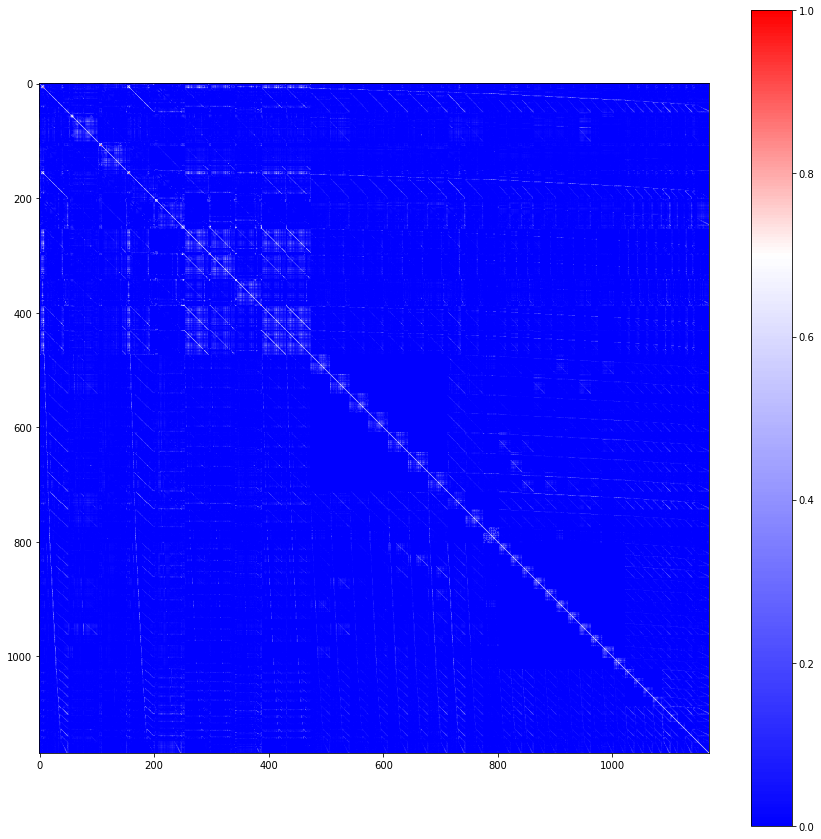

In [ ]:
from matplotlib.colors import TwoSlopeNorm
#Plotting 
plt.figure(figsize=(15,15))
plt.imshow(corr_cat,cmap='bwr', norm=TwoSlopeNorm(0.7,vmin=0,vmax=1))
plt.colorbar();

In [ ]:
from sklearn.linear_model import  LogisticRegression

lr = LogisticRegression(penalty = 'none', max_iter = 10_000)
lr.fit(X_train_f2, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(max_iter=10000, penalty='none')

In [ ]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, lr.predict_proba(X_test_f2)[:,1])
auc

0.7768034786756189

# Floresta Aleatória

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42, stratify = y)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

X_train_o = X_train.copy()
X_test_o  = X_test.copy()

#Making an encoder for each column, this way we will maintain traceability

encoders = {} # a chave vai ser o nome da coluna
for col,dtype in X_train_o.dtypes.items():
  if dtype == 'object':
    encoders[col] = OrdinalEncoder(handle_unknown= 'use_encoded_value', unknown_value = -1) # Here we are telling the function to set the value of -1 when it finds values not yet seen in the training data. To avoid mistakes.
    X_train_o.loc[:,col] = encoders[col].fit_transform(X_train_o[[col]]) # Using 2 square brackets, a dataframe will be removed from a column, instead of an array.
    X_test_o.loc[:,col] = encoders[col].transform(X_test_o[[col]]) # On training data ( Learn and transform ) and on test data ( Aprnas transform )

X_train_o

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
7309,50,1.0,2.0,0.0,0.0,0.0,0.0,1.0,6.0,2.0,2,999,0,1.0,1.1,93.994,-36.4,4.860,5191.0
4169,51,7.0,1.0,5.0,1.0,0.0,0.0,1.0,6.0,1.0,5,999,0,1.0,1.1,93.994,-36.4,4.858,5191.0
35810,46,9.0,0.0,5.0,0.0,2.0,0.0,0.0,6.0,1.0,2,999,0,1.0,-1.8,92.893,-46.2,1.244,5099.1
9668,46,0.0,2.0,6.0,0.0,2.0,0.0,1.0,4.0,1.0,1,999,0,1.0,1.4,94.465,-41.8,4.961,5228.1
34389,25,7.0,2.0,3.0,0.0,0.0,0.0,0.0,6.0,2.0,5,999,0,1.0,-1.8,92.893,-46.2,1.266,5099.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27855,29,9.0,2.0,5.0,0.0,0.0,0.0,0.0,5.0,3.0,2,999,0,1.0,-1.8,92.843,-50.0,1.614,5099.1
7494,29,0.0,1.0,6.0,0.0,0.0,0.0,1.0,6.0,0.0,1,999,0,1.0,1.1,93.994,-36.4,4.864,5191.0
10747,35,0.0,1.0,6.0,0.0,0.0,2.0,1.0,4.0,3.0,3,999,0,1.0,1.4,94.465,-41.8,4.961,5228.1
34138,32,1.0,2.0,0.0,0.0,2.0,2.0,0.0,6.0,4.0,4,999,0,1.0,-1.8,92.893,-46.2,1.281,5099.1


We can't say it's the best transformation for numbers, but we can already work better with our data after the transformation.

And using the for we managed to keep the pattern in our data, which would not happen if only the OrdinalEncoder method was applied throughout our base !!!

Our data is still quite spread out, "greatness" of each variable

**For the tree algorithm this is not a problem**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3,5,7,9,11,13,15],
   # 'class_weight' : [None, 'balanced'],
}

rf = GridSearchCV(RandomForestClassifier(n_estimators = 500, random_state = 42, n_jobs = -1),
                  params,
                  cv = 5, 
                  scoring = 'roc_auc',
                  verbose = 10                 
)

rf.fit(X_train_o, y_train) # duration of 7 min

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV 1/5; 1/14] START criterion=gini, max_depth=3................................
[CV 1/5; 1/14] END .criterion=gini, max_depth=3;, score=0.793 total time=   3.7s
[CV 2/5; 1/14] START criterion=gini, max_depth=3................................
[CV 2/5; 1/14] END .criterion=gini, max_depth=3;, score=0.801 total time=   3.7s
[CV 3/5; 1/14] START criterion=gini, max_depth=3................................
[CV 3/5; 1/14] END .criterion=gini, max_depth=3;, score=0.770 total time=   4.1s
[CV 4/5; 1/14] START criterion=gini, max_depth=3................................
[CV 4/5; 1/14] END .criterion=gini, max_depth=3;, score=0.789 total time=   3.7s
[CV 5/5; 1/14] START criterion=gini, max_depth=3................................
[CV 5/5; 1/14] END .criterion=gini, max_depth=3;, score=0.780 total time=   3.7s
[CV 1/5; 2/14] START criterion=gini, max_depth=5................................
[CV 1/5; 2/14] END .criterion=gini, max_depth=5;

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=500, n_jobs=-1,
                                              random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9, 11, 13, 15]},
             scoring='roc_auc', verbose=10)

In [ ]:
rf.best_params_

{'criterion': 'entropy', 'max_depth': 11}

In [ ]:
from sklearn.metrics import roc_auc_score

pred = rf.predict_proba(X_test_o)[:,1]

print('Score ROC_AUC : ', roc_auc_score(y_test, pred))

Score ROC_AUC :  0.8152218265012501


**Improving the visualization of import features**

In [ ]:
importance = rf.best_estimator_.feature_importances_
cols = X_train_o.columns
order = np.argsort(importance)[::-1] #Indexes that sort in ascending order, then we invert with [::-1] so that it is in descending order

for col,imp in zip(cols[order], importance[order]):
  print(f'{col:30s} {imp: .2f}')

euribor3m                       0.19
nr.employed                     0.14
emp.var.rate                    0.08
age                             0.08
pdays                           0.07
cons.conf.idx                   0.06
poutcome                        0.06
cons.price.idx                  0.05
campaign                        0.04
job                             0.04
education                       0.03
day_of_week                     0.03
month                           0.03
contact                         0.02
previous                        0.02
marital                         0.02
housing                         0.01
loan                            0.01
default                         0.01


# Gradiente Boosting 

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

from sklearn.preprocessing import OrdinalEncoder
X_train_o = X_train.copy()
X_test_o  = X_test.copy()

#Making an encoder for each column, this way we will maintain traceability

encoders = {} # a chave vai ser o nome da coluna
for col,dtype in X_train_o.dtypes.items():
  if dtype == 'object':
    encoders[col] = OrdinalEncoder(handle_unknown= 'use_encoded_value', unknown_value = -1) # Here we are telling the function to set the value of -1 when it finds values not yet seen in the training data. To avoid mistakes.
    X_train_o.loc[:,col] = encoders[col].fit_transform(X_train_o[[col]]) # Using 2 square brackets, a dataframe will be removed from a column, instead of an array.
    X_test_o.loc[:,col] = encoders[col].transform(X_test_o[[col]]) # On training data ( Learn and transform ) and on test data ( Aprnas transform )

X_train_o

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
39075,29,0.0,1.0,6.0,0.0,0.0,0.0,0.0,2.0,1.0,3,999,1,0.0,-3.0,92.713,-33.0,0.709,5023.5
34855,29,9.0,2.0,6.0,0.0,0.0,0.0,1.0,6.0,0.0,4,999,0,1.0,-1.8,92.893,-46.2,1.250,5099.1
7107,45,1.0,1.0,1.0,1.0,2.0,0.0,1.0,6.0,2.0,2,999,0,1.0,1.1,93.994,-36.4,4.860,5191.0
31614,34,7.0,1.0,6.0,0.0,0.0,0.0,0.0,6.0,2.0,1,999,1,0.0,-1.8,92.893,-46.2,1.327,5099.1
34878,32,0.0,2.0,3.0,0.0,0.0,0.0,0.0,6.0,0.0,9,999,0,1.0,-1.8,92.893,-46.2,1.250,5099.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,58,5.0,1.0,5.0,1.0,0.0,0.0,1.0,6.0,3.0,2,999,0,1.0,1.1,93.994,-36.4,4.857,5191.0
11284,37,4.0,1.0,6.0,0.0,0.0,0.0,1.0,4.0,2.0,1,999,0,1.0,1.4,94.465,-41.8,4.961,5228.1
38158,35,0.0,1.0,3.0,0.0,2.0,0.0,0.0,8.0,2.0,1,4,1,2.0,-3.4,92.431,-26.9,0.754,5017.5
860,40,4.0,1.0,6.0,0.0,2.0,0.0,1.0,6.0,4.0,2,999,0,1.0,1.1,93.994,-36.4,4.856,5191.0


# Utilizando LightLGBM

In [ ]:
# Using LightLGBM

from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth'     : [3,5,7,9,11],
    'n_estimators'  : [50,100,150,200],
    'learning_rate' : [0.01,0.03,0.05,0.1,0.2],
    'reg_alpha'     : [0,0.1,0.4,0.5,0.6,0.7],
    #'reg_lambda'    : [0,0.1,0.5]
}

lgbm = GridSearchCV(
    LGBMClassifier(n_estimators = 500, random_state = 42, n_jobs = -1),
    params,
    cv= 5,
    scoring = 'roc_auc',
    verbose = 10
)

lgbm.fit(X_train_o, y_train) #17 min

A saída de streaming foi truncada nas últimas 5000 linhas.
[CV 1/5; 101/600] START learning_rate=0.01, max_depth=11, n_estimators=50, reg_alpha=0.6
[CV 1/5; 101/600] END learning_rate=0.01, max_depth=11, n_estimators=50, reg_alpha=0.6;, score=0.795 total time=   0.3s
[CV 2/5; 101/600] START learning_rate=0.01, max_depth=11, n_estimators=50, reg_alpha=0.6
[CV 2/5; 101/600] END learning_rate=0.01, max_depth=11, n_estimators=50, reg_alpha=0.6;, score=0.795 total time=   0.3s
[CV 3/5; 101/600] START learning_rate=0.01, max_depth=11, n_estimators=50, reg_alpha=0.6
[CV 3/5; 101/600] END learning_rate=0.01, max_depth=11, n_estimators=50, reg_alpha=0.6;, score=0.799 total time=   0.3s
[CV 4/5; 101/600] START learning_rate=0.01, max_depth=11, n_estimators=50, reg_alpha=0.6
[CV 4/5; 101/600] END learning_rate=0.01, max_depth=11, n_estimators=50, reg_alpha=0.6;, score=0.808 total time=   0.3s
[CV 5/5; 101/600] START learning_rate=0.01, max_depth=11, n_estimators=50, reg_alpha=0.6
[CV 5/5; 101/600

GridSearchCV(cv=5, estimator=LGBMClassifier(n_estimators=500, random_state=42),
             param_grid={'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.2],
                         'max_depth': [3, 5, 7, 9, 11],
                         'n_estimators': [50, 100, 150, 200],
                         'reg_alpha': [0, 0.1, 0.4, 0.5, 0.6, 0.7]},
             scoring='roc_auc', verbose=10)

In [ ]:
lgbm.best_params_

{'learning_rate': 0.03, 'max_depth': 9, 'n_estimators': 100, 'reg_alpha': 0.6}

In [ ]:
from sklearn.metrics import roc_auc_score

pred = lgbm.predict_proba(X_test_o)[:,1]

print('Score ROC_AUC : ', roc_auc_score(y_test, pred))

Score ROC_AUC :  0.8000288751516946


In [ ]:
lgbm.best_estimator_.feature_importances_

array([547, 134,  29, 139,  50,  33,  15, 123, 128, 203, 318, 123,  62,
       102,  30, 127, 147, 581, 109])

In [ ]:
importance = lgbm.best_estimator_.feature_importances_
cols = X_train_o.columns
order = np.argsort(importance)[::-1] #Indexes that sort in ascending order, then we invert with [::-1] so that it is in descending order

for col,imp in zip(cols[order], importance[order]):
  print(f'{col:30s} {imp: .2f}')


# How many times the feature appeared in the trained trees

euribor3m                       581.00
age                             547.00
campaign                        318.00
day_of_week                     203.00
cons.conf.idx                   147.00
education                       139.00
job                             134.00
month                           128.00
cons.price.idx                  127.00
pdays                           123.00
contact                         123.00
nr.employed                     109.00
poutcome                        102.00
previous                        62.00
default                         50.00
housing                         33.00
emp.var.rate                    30.00
marital                         29.00
loan                            15.00


# Utilizando XGBOOST

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth'     : [3,5,7,9,11],
    'n_estimators'  : [50,100,150,200],
    'learning_rate' : [0.05,0.1,0.2],
    'reg_alpha'     : [0,0.1,0.5],
    #'reg_lambda'    : [0,0.1,0.5]
}

xbg = GridSearchCV(
    XGBClassifier(n_estimators = 500, random_state = 42, n_jobs = -1, use_label_encoder = False, eval_metrics = 'logloss'),
    params,
    cv= 5,
    scoring = 'roc_auc',
    verbose = 10
)

xbg.fit(X_train_o, y_train) # 40 min

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV 1/5; 1/180] START learning_rate=0.05, max_depth=3, n_estimators=50, reg_alpha=0
[CV 1/5; 1/180] END learning_rate=0.05, max_depth=3, n_estimators=50, reg_alpha=0;, score=0.792 total time=   0.8s
[CV 2/5; 1/180] START learning_rate=0.05, max_depth=3, n_estimators=50, reg_alpha=0
[CV 2/5; 1/180] END learning_rate=0.05, max_depth=3, n_estimators=50, reg_alpha=0;, score=0.789 total time=   0.7s
[CV 3/5; 1/180] START learning_rate=0.05, max_depth=3, n_estimators=50, reg_alpha=0
[CV 3/5; 1/180] END learning_rate=0.05, max_depth=3, n_estimators=50, reg_alpha=0;, score=0.795 total time=   1.0s
[CV 4/5; 1/180] START learning_rate=0.05, max_depth=3, n_estimators=50, reg_alpha=0
[CV 4/5; 1/180] END learning_rate=0.05, max_depth=3, n_estimators=50, reg_alpha=0;, score=0.806 total time=   2.8s
[CV 5/5; 1/180] START learning_rate=0.05, max_depth=3, n_estimators=50, reg_alpha=0
[CV 5/5; 1/180] END learning_rate=0.05, max_depth=3, n_es

GridSearchCV(cv=5,
             estimator=XGBClassifier(eval_metrics='logloss', n_estimators=500,
                                     n_jobs=-1, random_state=42,
                                     use_label_encoder=False),
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 5, 7, 9, 11],
                         'n_estimators': [50, 100, 150, 200],
                         'reg_alpha': [0, 0.1, 0.5]},
             scoring='roc_auc', verbose=10)

In [ ]:
xbg.best_params_


{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 150, 'reg_alpha': 0}

In [ ]:
from sklearn.metrics import roc_auc_score

pred = xbg.predict_proba(X_test_o)[:,1]

print('Score ROC_AUC : ', roc_auc_score(y_test, pred))

Score ROC_AUC :  0.798256752151294


In [ ]:
xbg.best_estimator_.feature_importances_


array([0.00905093, 0.00890982, 0.00915934, 0.00873132, 0.01764259,
       0.00809722, 0.00555823, 0.03087229, 0.02743469, 0.01556565,
       0.01048454, 0.06714299, 0.00672049, 0.0548044 , 0.02004739,
       0.01739921, 0.04614868, 0.03162432, 0.60460585], dtype=float32)

In [ ]:
importance = xbg.best_estimator_.feature_importances_
cols = X_train_o.columns
order = np.argsort(importance)[::-1] #Indexes that sort in ascending order, then we invert with [::-1] so that it is in descending order

for col,imp in zip(cols[order], importance[order]):
  print(f'{col:30s} {imp: .2f}')

nr.employed                     0.60
pdays                           0.07
poutcome                        0.05
cons.conf.idx                   0.05
euribor3m                       0.03
contact                         0.03
month                           0.03
emp.var.rate                    0.02
default                         0.02
cons.price.idx                  0.02
day_of_week                     0.02
campaign                        0.01
marital                         0.01
age                             0.01
job                             0.01
education                       0.01
housing                         0.01
previous                        0.01
loan                            0.01
